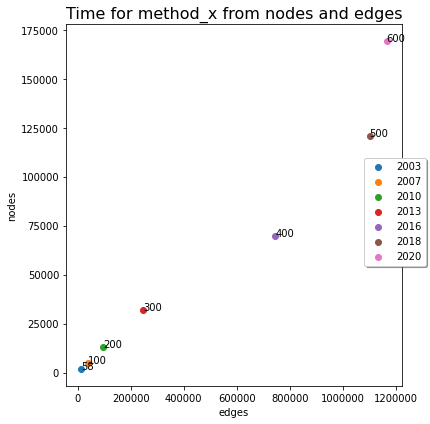

In [12]:
import matplotlib.pyplot as plt
y = [13485,36950,95867,246468,746051,1101792,1166243]
z = [1666, 4980, 12974, 31971, 69499,120740,169343]
n = [58, 100, 200, 300, 400,500,600]
year = [2003,2007,2010,2013,2016,2018,2020]
fig, ax = plt.subplots(figsize=(6, 6))
for _y,_z,_n,_year in zip(y,z,n,year):
    ax.scatter(_y,_z,label=_year)
    ax.annotate(_n, ( _y,_z))
fig.legend(loc="right",shadow=True, fancybox=True)
plt.xlabel("edges")
plt.ylabel("nodes")
ax.ticklabel_format(style='plain')
plt.title("Time for method_x from nodes and edges", fontsize=16)
plt.tight_layout()

In [13]:
import os
from graphdatascience import GraphDataScience

# Use Neo4j URI and credentials according to your setup
gds = GraphDataScience("bolt://192.168.0.178:7687", auth=(os.environ["NEO4J_LOGIN"], os.environ["NEO4J_PASSWORD"]))

print(gds.version())

2.1.1


In [14]:
directed_names = ["2003ArticlesDirected",
"2007ArticlesDirected",
"2010ArticlesDirected",
"2013ArticlesDirected",
"2016ArticlesDirected",
"2018ArticlesDirected",
"2020ArticlesDirected"]

undirected_names = ["2003ArticlesUndirected",
"2007ArticlesUndirected",
"2010ArticlesUndirected",
"2013ArticlesUndirected",
"2016ArticlesUndirected",
"2018ArticlesUndirected",
"2020ArticlesUndirected"]
graph_names = directed_names+undirected_names
def get_graph_names(count1:int,count2:int=-1)->list[str]:
    """get graph names but not all

    Args:
        count1 (int): how much to take from 0 to 7 directional graphs
        count2 (int, optional):  how much to take from 0 to 7 undirectional graphs. Defaults to -1.

    Returns:
        list[str]: concatenated graph names
    """
    if count2==-1:
        return directed_names[:count1]+undirected_names[:count1]
    return directed_names[:count1]+undirected_names[:count2]

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np

In [87]:


pageRankResult=pd.DataFrame([],columns=["graph","bytesMin","bytesMax","postProcessingMillis","preProcessingMillis","computeMillis","sumTimeMillis","stdSumTimeMillis"])
repeats= 10
store = np.zeros((repeats,3))
for name in graph_names:
    G = gds.graph.get(name)
    r1 = gds.pageRank.write.estimate(G,writeProperty='pageRank')

    for i in range(repeats):
        r2 = gds.pageRank.stats(G)
        store[i]=r2["postProcessingMillis"],r2["preProcessingMillis"],r2["computeMillis"]
        if r2["didConverge"]:
            print("Warning result converged!")
    postProcessingMillis,preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = np.average(np.sum(store,axis=1))
    stdSumTimeMillis = np.std(np.sum(store,axis=1))
    pageRankResult = pageRankResult.append({"graph":name,"bytesMin":r1["bytesMin"],"bytesMax":r1["bytesMax"],"postProcessingMillis":postProcessingMillis,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis,"stdSumTimeMillis":stdSumTimeMillis}, ignore_index=True)


PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

In [88]:
    pageRankResult.to_pickle("./pageRankResult.pkl")
    pageRankResult.head(20)


,graph,bytesMin,bytesMax,postProcessingMillis,preProcessingMillis,computeMillis,sumTimeMillis,stdSumTimeMillis
0,2003ArticlesDirected,40984,40984,24.9,0.0,14.7,39.6,10.489995
1,2007ArticlesDirected,120928,120928,35.2,0.0,16.2,51.4,7.391887
2,2010ArticlesDirected,313784,313784,40.7,0.0,29.3,70.0,7.099296
3,2013ArticlesDirected,772088,772088,66.1,0.0,45.4,111.5,17.060188
4,2016ArticlesDirected,1677448,1677448,79.8,0.0,153.9,233.7,58.813349
5,2018ArticlesDirected,2913640,2913640,97.4,0.0,170.2,267.6,17.76626
6,2020ArticlesDirected,4086184,4086184,111.4,0.0,210.4,321.8,25.273702
7,2003ArticlesUndirected,40984,40984,25.4,0.0,16.5,41.9,9.049309
8,2007ArticlesUndirected,120928,120928,31.8,0.0,20.7,52.5,8.333667
9,2010ArticlesUndirected,313784,313784,40.8,0.0,44.0,84.8,17.180221


In [85]:
articleRankResult=pd.DataFrame([],columns=["graph","bytesMin","bytesMax","postProcessingMillis","preProcessingMillis","computeMillis","sumTimeMillis","stdSumTimeMillis"])
repeats= 10
store = np.zeros((repeats,3))
for name in graph_names:
    G = gds.graph.get(name)
    r1 = gds.articleRank.write.estimate(G,writeProperty='articleRank')

    for i in range(repeats):
        r2 = gds.articleRank.stats(G)
        store[i]=r2["postProcessingMillis"],r2["preProcessingMillis"],r2["computeMillis"]
        if r2["didConverge"]:
            print("Warning result converged!")
    postProcessingMillis,preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = np.average(np.sum(store,axis=1))
    stdSumTimeMillis = np.std(np.sum(store,axis=1))
    articleRankResult = articleRankResult.append({"graph":name,"bytesMin":r1["bytesMin"],"bytesMax":r1["bytesMax"],"postProcessingMillis":postProcessingMillis,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis,"stdSumTimeMillis":stdSumTimeMillis}, ignore_index=True)

Warning result converged!
Warning result converged!
Warning result converged!
Warning result converged!
Warning result converged!
Warning result converged!
Warning result converged!
Warning result converged!
Warning result converged!
Warning result converged!


PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

In [86]:
articleRankResult.to_pickle("./articleRankResult.pkl")
articleRankResult.head(20)

,graph,bytesMin,bytesMax,postProcessingMillis,preProcessingMillis,computeMillis,sumTimeMillis,stdSumTimeMillis
0,2003ArticlesDirected,40984,40984,13.8,0.0,16.0,29.8,7.820486
1,2007ArticlesDirected,120928,120928,18.0,0.0,15.4,33.4,8.404761
2,2010ArticlesDirected,313784,313784,26.5,0.0,23.4,49.9,9.873702
3,2013ArticlesDirected,772088,772088,33.8,0.0,39.9,73.7,6.708949
4,2016ArticlesDirected,1677448,1677448,53.9,0.0,116.7,170.6,31.196795
5,2018ArticlesDirected,2913640,2913640,76.5,0.0,149.9,226.4,12.54751
6,2020ArticlesDirected,4086184,4086184,78.5,0.0,189.9,268.4,8.811356
7,2003ArticlesUndirected,40984,40984,11.0,0.0,19.6,30.6,10.956277
8,2007ArticlesUndirected,120928,120928,15.2,0.1,26.2,41.5,15.088075
9,2010ArticlesUndirected,313784,313784,23.5,0.0,39.0,62.5,14.534442


In [83]:
eigenvectorResult=pd.DataFrame([],columns=["graph","bytesMin","bytesMax","postProcessingMillis","preProcessingMillis","computeMillis","sumTimeMillis","stdSumTimeMillis"])
repeats= 10
store = np.zeros((repeats,3))
for name in graph_names:
    G = gds.graph.get(name)
    r1 = gds.eigenvector.write.estimate(G,writeProperty='eigenvector')

    for i in range(repeats):
        r2 = gds.eigenvector.stats(G)
        store[i]=r2["postProcessingMillis"],r2["preProcessingMillis"],r2["computeMillis"]
        if r2["didConverge"]:
            print("Warning result converged!")
    postProcessingMillis,preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = np.average(np.sum(store,axis=1))
    stdSumTimeMillis = np.std(np.sum(store,axis=1))
    eigenvectorResult = eigenvectorResult.append({"graph":name,"bytesMin":r1["bytesMin"],"bytesMax":r1["bytesMax"],"postProcessingMillis":postProcessingMillis,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis,"stdSumTimeMillis":stdSumTimeMillis}, ignore_index=True)

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

PageRank:   0%|          | 0/100 [00:00<?, ?%/s]

In [84]:
eigenvectorResult.to_pickle("./eigenvectorResult.pkl")
eigenvectorResult.head(20)

,graph,bytesMin,bytesMax,postProcessingMillis,preProcessingMillis,computeMillis,sumTimeMillis,stdSumTimeMillis
0,2003ArticlesDirected,40984,40984,29.9,0.0,31.5,61.4,34.496956
1,2007ArticlesDirected,120928,120928,31.9,0.0,28.3,60.2,7.909488
2,2010ArticlesDirected,313784,313784,41.8,0.0,63.5,105.3,30.757276
3,2013ArticlesDirected,772088,772088,67.8,0.0,122.6,190.4,52.782952
4,2016ArticlesDirected,1677448,1677448,57.7,0.0,223.5,281.2,35.910444
5,2018ArticlesDirected,2913640,2913640,68.2,0.0,341.4,409.6,29.665468
6,2020ArticlesDirected,4086184,4086184,70.8,0.0,506.5,577.3,66.571841
7,2003ArticlesUndirected,40984,40984,46.9,0.0,39.2,86.1,48.734895
8,2007ArticlesUndirected,120928,120928,21.7,0.0,44.8,66.5,34.995
9,2010ArticlesUndirected,313784,313784,50.4,0.0,68.2,118.6,30.75126


In [56]:
betweennessResult=pd.DataFrame([],columns=["graph","bytesMin","bytesMax","postProcessingMillis","preProcessingMillis","computeMillis","sumTimeMillis"])
repeats= 10
store = np.zeros((repeats,3))
for name in graph_names:
    G = gds.graph.get(name)
    r1 = gds.betweenness.write.estimate(G,writeProperty='betweenness')

    for i in range(repeats):
        r2 = gds.betweenness.stats(G)
        store[i]=r2["postProcessingMillis"],r2["preProcessingMillis"],r2["computeMillis"]

    postProcessingMillis,preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = postProcessingMillis+preProcessingMillis+computeMillis
    # didn't add std because it is too slow to repeat
    betweennessResult = betweennessResult.append({"graph":name,"bytesMin":r1["bytesMin"],"bytesMax":r1["bytesMax"],"postProcessingMillis":postProcessingMillis,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis}, ignore_index=True)

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

BetweennessCentrality:   0%|          | 0/100 [00:00<?, ?%/s]

KeyboardInterrupt: 

In [81]:
betweennessResult.to_pickle("./betweennessResult.pkl")
betweennessResult.head(20)

,graph,bytesMin,bytesMax,postProcessingMillis,preProcessingMillis,computeMillis,sumTimeMillis
0,2003ArticlesDirected,468168,468168,64.7,0.0,16.4,81.1
1,2007ArticlesDirected,1396088,1396088,83.4,0.0,15.6,99.0
2,2010ArticlesDirected,3634408,3634408,211.1,0.0,116.3,327.4
3,2013ArticlesDirected,9976656,9976656,468.4,0.0,1511.3,1979.7
4,2016ArticlesDirected,23909360,23909360,639.8,0.0,48331.2,48971.0
5,2018ArticlesDirected,49263608,49263608,615.6,0.0,271265.1,271880.7
6,2020ArticlesDirected,74512624,74512624,653.6,0.0,832704.9,833358.5
7,2003ArticlesUndirected,521480,521480,125.8,0.0,27.2,153.0
8,2007ArticlesUndirected,1555448,1555448,162.1,0.0,273.1,435.2
9,2010ArticlesUndirected,4464744,4464744,293.6,0.0,4703.7,4997.3


In [65]:
degreeResult=pd.DataFrame([],columns=["graph","bytesMin","bytesMax","postProcessingMillis","preProcessingMillis","computeMillis","sumTimeMillis","stdSumTimeMillis"])
repeats= 10
store = np.zeros((repeats,3))
for name in graph_names:
    G = gds.graph.get(name)
    r1 = gds.degree.write.estimate(G,writeProperty='degree')

    for i in range(repeats):
        r2 = gds.degree.stats(G)
        store[i]=r2["postProcessingMillis"],r2["preProcessingMillis"],r2["computeMillis"]

    postProcessingMillis,preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = np.average(np.sum(store,axis=1))
    stdSumTimeMillis = np.std(np.sum(store,axis=1))
    degreeResult = degreeResult.append({"graph":name,"bytesMin":r1["bytesMin"],"bytesMax":r1["bytesMax"],"postProcessingMillis":postProcessingMillis,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis,"stdSumTimeMillis":stdSumTimeMillis}, ignore_index=True)

In [80]:
degreeResult.to_pickle("./degreeResult.pkl")
degreeResult.head(20)

,graph,bytesMin,bytesMax,postProcessingMillis,preProcessingMillis,computeMillis,sumTimeMillis,stdSumTimeMillis
0,2003ArticlesDirected,56,56,8.2,0.0,0.0,8.2,1.16619
1,2007ArticlesDirected,56,56,7.6,0.0,0.0,7.6,0.663325
2,2010ArticlesDirected,56,56,18.7,0.0,0.0,18.7,0.9
3,2013ArticlesDirected,56,56,28.1,0.0,0.0,28.1,1.3
4,2016ArticlesDirected,56,56,52.2,0.0,0.0,52.2,6.764614
5,2018ArticlesDirected,56,56,66.8,0.0,2.2,69.0,11.462984
6,2020ArticlesDirected,56,56,74.2,0.0,0.0,74.2,5.418487
7,2003ArticlesUndirected,56,56,15.1,0.0,0.0,15.1,5.262129
8,2007ArticlesUndirected,56,56,14.4,0.0,0.0,14.4,1.280625
9,2010ArticlesUndirected,56,56,27.3,0.0,0.0,27.3,1.187434


In [71]:
closenessResult=pd.DataFrame([],columns=["graph","postProcessingMillis","preProcessingMillis","computeMillis","sumTimeMillis","stdSumTimeMillis"])
repeats= 10
store = np.zeros((repeats,3))
for name in get_graph_names(5,4):
    print(name)
    G = gds.graph.get(name)
    # r1 = gds.beta.closeness.write.estimate(G,useWassermanFaust=True,writeProperty='closeness')

    for i in range(repeats):
        r2 = gds.beta.closeness.stats(G,useWassermanFaust=True)
        store[i]=r2["postProcessingMillis"],r2["preProcessingMillis"],r2["computeMillis"]

    postProcessingMillis,preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = np.average(np.sum(store,axis=1))
    stdSumTimeMillis = np.std(np.sum(store,axis=1))
    closenessResult = closenessResult.append({"graph":name,"postProcessingMillis":postProcessingMillis,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis,"stdSumTimeMillis":stdSumTimeMillis}, ignore_index=True)

2003ArticlesDirected
2007ArticlesDirected
2010ArticlesDirected
2013ArticlesDirected
2016ArticlesDirected
2003ArticlesUndirected
2007ArticlesUndirected
2010ArticlesUndirected
2013ArticlesUndirected


In [79]:
closenessResult.to_pickle("./closenessResult.pkl")
closenessResult.head(20)

,graph,postProcessingMillis,preProcessingMillis,computeMillis,sumTimeMillis,stdSumTimeMillis
0,2003ArticlesDirected,23.2,0.0,1.5,24.7,7.253275
1,2007ArticlesDirected,30.6,2.1,7.9,40.6,14.927826
2,2010ArticlesDirected,47.6,0.0,118.3,165.9,24.114104
3,2013ArticlesDirected,72.6,0.0,1315.3,1387.9,88.69549
4,2016ArticlesDirected,93.5,0.0,23648.0,23741.5,523.105009
5,2003ArticlesUndirected,23.4,0.0,29.1,52.5,8.20061
6,2007ArticlesUndirected,35.5,0.0,324.5,360.0,9.705668
7,2010ArticlesUndirected,57.4,0.0,2616.5,2673.9,32.234919
8,2013ArticlesUndirected,122.4,0.0,16639.7,16762.1,206.381419


In [76]:
harmonicResult=pd.DataFrame([],columns=["graph","preProcessingMillis","computeMillis","sumTimeMillis","stdSumTimeMillis"])
repeats= 10 
store = np.zeros((repeats,2))
for name in graph_names:
    print(name)
    G = gds.graph.get(name)
    # r1 = gds.alpha.closeness.harmonic.write.estimate(G,writeProperty='harmonic')

    for i in range(repeats):
        r2 = gds.alpha.closeness.harmonic.write(G)
        store[i]=r2["preProcessingMillis"],r2["computeMillis"]

    preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = np.average(np.sum(store,axis=1))
    stdSumTimeMillis = np.std(np.sum(store,axis=1))
    harmonicResult = harmonicResult.append({"graph":name,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis,"stdSumTimeMillis":stdSumTimeMillis}, ignore_index=True)

2003ArticlesDirected
2007ArticlesDirected
2010ArticlesDirected
2013ArticlesDirected
2016ArticlesDirected
2018ArticlesDirected
2020ArticlesDirected
2003ArticlesUndirected
2007ArticlesUndirected
2010ArticlesUndirected
2013ArticlesUndirected
2016ArticlesUndirected
2018ArticlesUndirected
2020ArticlesUndirected


In [77]:
harmonicResult.to_pickle("./harmonicResult.pkl")
harmonicResult.head(20)

,graph,preProcessingMillis,computeMillis,sumTimeMillis,stdSumTimeMillis
0,2003ArticlesDirected,0.0,0.6,0.6,0.916515
1,2007ArticlesDirected,0.0,4.4,4.4,2.154066
2,2010ArticlesDirected,0.0,70.9,70.9,19.279263
3,2013ArticlesDirected,0.0,692.3,692.3,115.422745
4,2016ArticlesDirected,0.0,10636.3,10636.3,1018.321467
5,2018ArticlesDirected,0.0,60388.5,60388.5,3278.735008
6,2020ArticlesDirected,0.0,156017.7,156017.7,8719.545402
7,2003ArticlesUndirected,0.0,7.5,7.5,1.284523
8,2007ArticlesUndirected,0.0,108.0,108.0,24.531612
9,2010ArticlesUndirected,0.0,788.5,788.5,53.417694


In [91]:
hitsResult=pd.DataFrame([],columns=["graph","postProcessingMillis","preProcessingMillis","computeMillis","sumTimeMillis","stdSumTimeMillis"])
repeats= 10 
store = np.zeros((repeats,3))
for name in graph_names:
    print(name)
    G = gds.graph.get(name)
    # r1 = gds.alpha.hits.write.estimate(G)

    for i in range(repeats):
        r2 = gds.alpha.hits.stats(G,hitsIterations= 20)
        store[i]=r2["postProcessingMillis"],r2["preProcessingMillis"],r2["computeMillis"]

    postProcessingMillis,preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = np.average(np.sum(store,axis=1))
    stdSumTimeMillis = np.std(np.sum(store,axis=1))
    hitsResult = hitsResult.append({"graph":name,"postProcessingMillis":postProcessingMillis,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis,"stdSumTimeMillis":stdSumTimeMillis}, ignore_index=True)

2003ArticlesDirected
2007ArticlesDirected
2010ArticlesDirected
2013ArticlesDirected
2016ArticlesDirected


HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

2018ArticlesDirected


HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

2020ArticlesDirected


HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

2003ArticlesUndirected
2007ArticlesUndirected
2010ArticlesUndirected
2013ArticlesUndirected
2016ArticlesUndirected


HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

2018ArticlesUndirected


HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

2020ArticlesUndirected


HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

HitsImpl:   0%|          | 0/100 [00:00<?, ?%/s]

In [92]:
hitsResult.to_pickle("./hitsResult.pkl")
hitsResult.head(20)

,graph,postProcessingMillis,preProcessingMillis,computeMillis,sumTimeMillis,stdSumTimeMillis
0,2003ArticlesDirected,0.0,0.0,63.5,63.5,75.28114
1,2007ArticlesDirected,0.0,0.0,65.6,65.6,10.983624
2,2010ArticlesDirected,0.0,0.0,160.4,160.4,15.837929
3,2013ArticlesDirected,0.0,0.0,240.2,240.2,31.88981
4,2016ArticlesDirected,0.0,0.0,705.2,705.2,60.001333
5,2018ArticlesDirected,0.0,0.0,1428.3,1428.3,42.284867
6,2020ArticlesDirected,0.0,0.0,2432.8,2432.8,116.718293
7,2003ArticlesUndirected,0.0,0.0,38.8,38.8,30.221846
8,2007ArticlesUndirected,0.0,0.0,86.7,86.7,27.989462
9,2010ArticlesUndirected,0.0,0.0,206.5,206.5,33.865174


In [20]:
louvain=pd.DataFrame([],columns=["graph","bytesMin","bytesMax","postProcessingMillis","preProcessingMillis","computeMillis","sumTimeMillis","stdSumTimeMillis"])
repeats= 5 
store = np.zeros((repeats,3))
for name in graph_names:
    print(name)
    G = gds.graph.get(name)
    r1 =gds.louvain.write.estimate(G,writeProperty= 'community')

    for i in range(repeats):
        r2 = gds.louvain.stats(G)
        store[i]=r2["postProcessingMillis"],r2["preProcessingMillis"],r2["computeMillis"]

    postProcessingMillis,preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = np.average(np.sum(store,axis=1))
    stdSumTimeMillis = np.std(np.sum(store,axis=1))
    louvain = louvain.append({"graph":name,"bytesMin":r1["bytesMin"],"bytesMax":r1["bytesMax"],"postProcessingMillis":postProcessingMillis,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis,"stdSumTimeMillis":stdSumTimeMillis}, ignore_index=True)

2003ArticlesDirected


Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

2007ArticlesDirected
2010ArticlesDirected
2013ArticlesDirected


Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

2016ArticlesDirected


Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

2018ArticlesDirected


Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

2020ArticlesDirected


Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

2003ArticlesUndirected
2007ArticlesUndirected
2010ArticlesUndirected


Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

2013ArticlesUndirected


Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

2016ArticlesUndirected


Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

2018ArticlesUndirected


Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

2020ArticlesUndirected


Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

Louvain:   0%|          | 0/100 [00:00<?, ?%/s]

In [21]:
louvain.to_pickle("./louvain.pkl")
louvain.head(20)

,graph,bytesMin,bytesMax,postProcessingMillis,preProcessingMillis,computeMillis,sumTimeMillis,stdSumTimeMillis
0,2003ArticlesDirected,112129,979624,1.0,0.0,478.2,479.2,205.078912
1,2007ArticlesDirected,324633,1847928,1.0,0.0,71.2,72.2,8.565045
2,2010ArticlesDirected,837249,4191224,2.4,0.0,297.8,300.2,92.187635
3,2013ArticlesDirected,2055433,10160736,3.6,0.0,503.4,507.0,69.088349
4,2016ArticlesDirected,4461913,23063792,3.8,0.0,874.0,877.8,131.160055
5,2018ArticlesDirected,7747745,45061120,5.4,0.0,1685.2,1690.6,298.851535
6,2020ArticlesDirected,10864409,68195808,5.0,0.0,1461.4,1466.4,291.792803
7,2003ArticlesUndirected,112129,979624,1.0,0.0,69.6,70.6,40.844094
8,2007ArticlesUndirected,324633,1847928,2.4,0.0,284.0,286.4,47.02595
9,2010ArticlesUndirected,837249,4453400,2.0,0.0,454.2,456.2,77.189118


In [7]:
labelPropagation=pd.DataFrame([],columns=["graph","bytesMin","bytesMax","postProcessingMillis","preProcessingMillis","computeMillis","sumTimeMillis","stdSumTimeMillis"])
repeats= 10 
store = np.zeros((repeats,3))
for name in graph_names:
    print(name)
    G = gds.graph.get(name)
    r1 =gds.labelPropagation.write.estimate(G,writeProperty= 'labelPropagation')

    for i in range(repeats):
        r2 = gds.labelPropagation.stats(G)
        store[i]=r2["postProcessingMillis"],r2["preProcessingMillis"],r2["computeMillis"]

    postProcessingMillis,preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = np.average(np.sum(store,axis=1))
    stdSumTimeMillis = np.std(np.sum(store,axis=1))
    labelPropagation = labelPropagation.append({"graph":name,"bytesMin":r1["bytesMin"],"bytesMax":r1["bytesMax"],"postProcessingMillis":postProcessingMillis,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis,"stdSumTimeMillis":stdSumTimeMillis}, ignore_index=True)

2003ArticlesDirected
2007ArticlesDirected
2010ArticlesDirected
2013ArticlesDirected
2016ArticlesDirected
2018ArticlesDirected
2020ArticlesDirected
2003ArticlesUndirected
2007ArticlesUndirected
2010ArticlesUndirected
2013ArticlesUndirected
2016ArticlesUndirected
2018ArticlesUndirected


LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

2020ArticlesUndirected


LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

LabelPropagation:   0%|          | 0/100 [00:00<?, ?%/s]

In [8]:
labelPropagation.to_pickle("./labelPropagation.pkl")
labelPropagation.head(20)

,graph,bytesMin,bytesMax,postProcessingMillis,preProcessingMillis,computeMillis,sumTimeMillis,stdSumTimeMillis
0,2003ArticlesDirected,15384,277016,2.8,0.0,11.6,14.4,1.624808
1,2007ArticlesDirected,41896,565672,4.3,0.0,16.1,20.4,5.276362
2,2010ArticlesDirected,105848,2202488,3.5,0.0,43.1,46.6,7.644606
3,2013ArticlesDirected,257824,4451616,6.0,0.0,73.1,79.1,18.944392
4,2016ArticlesDirected,558048,8946144,7.1,0.0,110.8,117.9,20.564289
5,2018ArticlesDirected,967976,17744680,9.3,0.0,215.3,224.6,8.475848
6,2020ArticlesDirected,1356800,18133504,9.7,0.0,324.3,334.0,16.583124
7,2003ArticlesUndirected,15384,277016,3.1,0.0,11.7,14.8,2.181742
8,2007ArticlesUndirected,41896,565672,2.7,0.0,26.2,28.9,5.990826
9,2010ArticlesUndirected,105848,2202488,4.7,0.0,58.8,63.5,10.404326


In [9]:
wcc=pd.DataFrame([],columns=["graph","bytesMin","bytesMax","postProcessingMillis","preProcessingMillis","computeMillis","sumTimeMillis","stdSumTimeMillis"])
repeats= 10 
store = np.zeros((repeats,3))
for name in graph_names:
    print(name)
    G = gds.graph.get(name)
    r1 =gds.wcc.write.estimate(G,writeProperty= 'wcc')

    for i in range(repeats):
        r2 = gds.wcc.stats(G)
        store[i]=r2["postProcessingMillis"],r2["preProcessingMillis"],r2["computeMillis"]

    postProcessingMillis,preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = np.average(np.sum(store,axis=1))
    stdSumTimeMillis = np.std(np.sum(store,axis=1))
    wcc = wcc.append({"graph":name,"bytesMin":r1["bytesMin"],"bytesMax":r1["bytesMax"],"postProcessingMillis":postProcessingMillis,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis,"stdSumTimeMillis":stdSumTimeMillis}, ignore_index=True)

2003ArticlesDirected
2007ArticlesDirected
2010ArticlesDirected
2013ArticlesDirected
2016ArticlesDirected
2018ArticlesDirected
2020ArticlesDirected
2003ArticlesUndirected
2007ArticlesUndirected
2010ArticlesUndirected
2013ArticlesUndirected
2016ArticlesUndirected
2018ArticlesUndirected
2020ArticlesUndirected


In [10]:
wcc.to_pickle("./wcc.pkl")
wcc.head(20)

,graph,bytesMin,bytesMax,postProcessingMillis,preProcessingMillis,computeMillis,sumTimeMillis,stdSumTimeMillis
0,2003ArticlesDirected,13424,13424,1.0,0.0,1.5,2.5,0.67082
1,2007ArticlesDirected,39936,39936,1.0,0.0,2.1,3.1,0.538516
2,2010ArticlesDirected,103888,103888,1.2,0.0,3.0,4.2,0.4
3,2013ArticlesDirected,255864,255864,2.3,0.0,5.5,7.8,2.181742
4,2016ArticlesDirected,556088,556088,3.3,0.0,7.9,11.2,3.789459
5,2018ArticlesDirected,966016,966016,6.8,0.0,14.3,21.1,8.525843
6,2020ArticlesDirected,1354840,1354840,2.1,0.0,20.4,22.5,5.95399
7,2003ArticlesUndirected,13424,13424,0.2,0.0,1.0,1.2,0.4
8,2007ArticlesUndirected,39936,39936,0.3,0.0,1.6,1.9,0.7
9,2010ArticlesUndirected,103888,103888,1.0,0.0,2.9,3.9,0.3


In [11]:
triangleCount=pd.DataFrame([],columns=["graph","bytesMin","bytesMax","postProcessingMillis","preProcessingMillis","computeMillis","sumTimeMillis","stdSumTimeMillis"])
repeats= 10 
store = np.zeros((repeats,3))
for name in undirected_names:
    print(name)
    G = gds.graph.get(name)
    r1 =gds.triangleCount.write.estimate(G,writeProperty= 'triangleCount')

    for i in range(repeats):
        r2 = gds.triangleCount.stats(G)
        store[i]=r2["postProcessingMillis"],r2["preProcessingMillis"],r2["computeMillis"]

    postProcessingMillis,preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = np.average(np.sum(store,axis=1))
    stdSumTimeMillis = np.std(np.sum(store,axis=1))
    triangleCount = triangleCount.append({"graph":name,"bytesMin":r1["bytesMin"],"bytesMax":r1["bytesMax"],"postProcessingMillis":postProcessingMillis,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis,"stdSumTimeMillis":stdSumTimeMillis}, ignore_index=True)

2003ArticlesUndirected
2007ArticlesUndirected
2010ArticlesUndirected
2013ArticlesUndirected
2016ArticlesUndirected
2018ArticlesUndirected
2020ArticlesUndirected


IntersectingTriangleCount:   0%|          | 0/100 [00:00<?, ?%/s]

IntersectingTriangleCount:   0%|          | 0/100 [00:00<?, ?%/s]

IntersectingTriangleCount:   0%|          | 0/100 [00:00<?, ?%/s]

IntersectingTriangleCount:   0%|          | 0/100 [00:00<?, ?%/s]

IntersectingTriangleCount:   0%|          | 0/100 [00:00<?, ?%/s]

IntersectingTriangleCount:   0%|          | 0/100 [00:00<?, ?%/s]

IntersectingTriangleCount:   0%|          | 0/100 [00:00<?, ?%/s]

IntersectingTriangleCount:   0%|          | 0/100 [00:00<?, ?%/s]

IntersectingTriangleCount:   0%|          | 0/100 [00:00<?, ?%/s]

IntersectingTriangleCount:   0%|          | 0/100 [00:00<?, ?%/s]

In [12]:
triangleCount.to_pickle("./triangleCount.pkl")
triangleCount.head(20)

,graph,bytesMin,bytesMax,postProcessingMillis,preProcessingMillis,computeMillis,sumTimeMillis,stdSumTimeMillis
0,2003ArticlesUndirected,13488,13488,0.0,0.0,4.5,4.5,2.974895
1,2007ArticlesUndirected,40000,40000,0.0,0.0,5.3,5.3,0.9
2,2010ArticlesUndirected,103952,103952,0.0,0.0,8.9,8.9,1.3
3,2013ArticlesUndirected,255928,255928,0.0,0.0,11.8,11.8,5.52811
4,2016ArticlesUndirected,556152,556152,0.0,0.0,47.3,47.3,5.657738
5,2018ArticlesUndirected,966080,966080,0.0,0.0,289.5,289.5,33.058282
6,2020ArticlesUndirected,1354904,1354904,0.0,0.0,939.4,939.4,81.549004


In [13]:
localClusteringCoefficient=pd.DataFrame([],columns=["graph","bytesMin","bytesMax","postProcessingMillis","preProcessingMillis","computeMillis","sumTimeMillis","stdSumTimeMillis"])
repeats= 10 
store = np.zeros((repeats,3))
for name in undirected_names:
    print(name)
    G = gds.graph.get(name)
    r1 =gds.localClusteringCoefficient.write.estimate(G,writeProperty= 'localClusteringCoefficient')

    for i in range(repeats):
        r2 = gds.localClusteringCoefficient.stats(G)
        store[i]=r2["postProcessingMillis"],r2["preProcessingMillis"],r2["computeMillis"]

    postProcessingMillis,preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = np.average(np.sum(store,axis=1))
    stdSumTimeMillis = np.std(np.sum(store,axis=1))
    localClusteringCoefficient = localClusteringCoefficient.append({"graph":name,"bytesMin":r1["bytesMin"],"bytesMax":r1["bytesMax"],"postProcessingMillis":postProcessingMillis,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis,"stdSumTimeMillis":stdSumTimeMillis}, ignore_index=True)

2003ArticlesUndirected
2007ArticlesUndirected
2010ArticlesUndirected
2013ArticlesUndirected
2016ArticlesUndirected
2018ArticlesUndirected
2020ArticlesUndirected


LocalClusteringCoefficient:   0%|          | 0/100 [00:00<?, ?%/s]

LocalClusteringCoefficient:   0%|          | 0/100 [00:00<?, ?%/s]

LocalClusteringCoefficient:   0%|          | 0/100 [00:00<?, ?%/s]

LocalClusteringCoefficient:   0%|          | 0/100 [00:00<?, ?%/s]

LocalClusteringCoefficient:   0%|          | 0/100 [00:00<?, ?%/s]

LocalClusteringCoefficient:   0%|          | 0/100 [00:00<?, ?%/s]

LocalClusteringCoefficient:   0%|          | 0/100 [00:00<?, ?%/s]

LocalClusteringCoefficient:   0%|          | 0/100 [00:00<?, ?%/s]

LocalClusteringCoefficient:   0%|          | 0/100 [00:00<?, ?%/s]

LocalClusteringCoefficient:   0%|          | 0/100 [00:00<?, ?%/s]

In [14]:
localClusteringCoefficient.to_pickle("./localClusteringCoefficient.pkl")
localClusteringCoefficient.head(20)

,graph,bytesMin,bytesMax,postProcessingMillis,preProcessingMillis,computeMillis,sumTimeMillis,stdSumTimeMillis
0,2003ArticlesUndirected,26952,26952,0.0,0.0,5.2,5.2,0.748331
1,2007ArticlesUndirected,79976,79976,0.0,0.0,4.8,4.8,0.6
2,2010ArticlesUndirected,207880,207880,0.0,0.0,7.0,7.0,1.0
3,2013ArticlesUndirected,511832,511832,0.0,0.0,11.4,11.4,1.113553
4,2016ArticlesUndirected,1112280,1112280,0.0,0.0,51.6,51.6,2.537716
5,2018ArticlesUndirected,1932136,1932136,0.0,0.0,285.3,285.3,33.232665
6,2020ArticlesUndirected,2709784,2709784,0.0,0.0,885.4,885.4,58.356148


In [16]:
modularityOptimization=pd.DataFrame([],columns=["graph","bytesMin","bytesMax","postProcessingMillis","preProcessingMillis","computeMillis","sumTimeMillis","stdSumTimeMillis"])
repeats= 10 
store = np.zeros((repeats,3))
for name in undirected_names:
    print(name)
    G = gds.graph.get(name)
    r1 =gds.beta.modularityOptimization.write.estimate(G,writeProperty= 'modularityOptimization')

    for i in range(repeats):
        r2 = gds.beta.modularityOptimization.write(G,writeProperty= 'modularityOptimization')
        store[i]=r2["postProcessingMillis"],r2["preProcessingMillis"],r2["computeMillis"]

    postProcessingMillis,preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = np.average(np.sum(store,axis=1))
    stdSumTimeMillis = np.std(np.sum(store,axis=1))
    modularityOptimization = modularityOptimization.append({"graph":name,"bytesMin":r1["bytesMin"],"bytesMax":r1["bytesMax"],"postProcessingMillis":postProcessingMillis,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis,"stdSumTimeMillis":stdSumTimeMillis}, ignore_index=True)

2003ArticlesUndirected
2007ArticlesUndirected
2010ArticlesUndirected
2013ArticlesUndirected
2016ArticlesUndirected


ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

2018ArticlesUndirected


ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

2020ArticlesUndirected


ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

ModularityOptimization:   0%|          | 0/100 [00:00<?, ?%/s]

In [17]:
modularityOptimization.to_pickle("./modularityOptimization.pkl")
modularityOptimization.head(20)

,graph,bytesMin,bytesMax,postProcessingMillis,preProcessingMillis,computeMillis,sumTimeMillis,stdSumTimeMillis
0,2003ArticlesUndirected,98656,241320,0.3,0.0,39.4,39.7,29.89331
1,2007ArticlesUndirected,284648,718912,0.8,0.0,62.0,62.8,45.943008
2,2010ArticlesUndirected,733312,1871080,1.1,0.0,87.8,88.9,10.539924
3,2013ArticlesUndirected,1799520,4609008,2.1,0.0,170.4,172.5,45.640443
4,2016ArticlesUndirected,3905776,10017728,3.2,0.0,414.7,417.9,101.619339
5,2018ArticlesUndirected,6781680,17402824,8.9,0.0,1201.9,1210.8,402.862458
6,2020ArticlesUndirected,9509520,24407744,39.2,0.0,1718.0,1757.2,270.96819


In [19]:
scc=pd.DataFrame([],columns=["graph","postProcessingMillis","preProcessingMillis","computeMillis","sumTimeMillis","stdSumTimeMillis"])
repeats= 10 
store = np.zeros((repeats,3))
for name in graph_names:
    print(name)
    G = gds.graph.get(name)
    # r1 =gds.alpha.scc.write.estimate(G,writeProperty= 'scc')

    for i in range(repeats):
        r2 = gds.alpha.scc.write(G,writeProperty= 'scc')
        store[i]=r2["postProcessingMillis"],r2["preProcessingMillis"],r2["computeMillis"]

    postProcessingMillis,preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = np.average(np.sum(store,axis=1))
    stdSumTimeMillis = np.std(np.sum(store,axis=1))
    scc = scc.append({"graph":name,"postProcessingMillis":postProcessingMillis,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis,"stdSumTimeMillis":stdSumTimeMillis}, ignore_index=True)

2003ArticlesDirected
2007ArticlesDirected
2010ArticlesDirected
2013ArticlesDirected
2016ArticlesDirected
2018ArticlesDirected
2020ArticlesDirected
2003ArticlesUndirected
2007ArticlesUndirected
2010ArticlesUndirected
2013ArticlesUndirected
2016ArticlesUndirected
2018ArticlesUndirected
2020ArticlesUndirected


In [20]:
scc.to_pickle("./scc.pkl")
scc.head(20)

,graph,postProcessingMillis,preProcessingMillis,computeMillis,sumTimeMillis,stdSumTimeMillis
0,2003ArticlesDirected,10.0,0.0,3.8,13.8,7.678542
1,2007ArticlesDirected,12.1,0.0,2.1,14.2,13.234803
2,2010ArticlesDirected,18.5,0.0,2.9,21.4,16.378034
3,2013ArticlesDirected,18.6,2.3,7.6,28.5,19.901005
4,2016ArticlesDirected,41.5,0.0,28.1,69.6,66.013938
5,2018ArticlesDirected,78.5,0.0,52.8,131.3,85.465841
6,2020ArticlesDirected,106.2,0.0,91.2,197.4,123.49996
7,2003ArticlesUndirected,2.9,0.0,0.0,2.9,1.445683
8,2007ArticlesUndirected,7.0,0.0,1.0,8.0,5.059644
9,2010ArticlesUndirected,18.0,0.0,6.1,24.1,21.920082


In [5]:
sllpa=pd.DataFrame([],columns=["graph","bytesMin","bytesMax","postProcessingMillis","preProcessingMillis","computeMillis","sumTimeMillis","stdSumTimeMillis"])
repeats= 10 
store = np.zeros((repeats,3))
for name in graph_names:
    print(name)
    G = gds.graph.get(name)
    r1 =gds.alpha.sllpa.write.estimate(G,writeProperty= 'sllpa',maxIterations= 100)

    for i in range(repeats):
        r2 = gds.alpha.sllpa.stats(G,writeProperty= 'sllpa',maxIterations= 100)
        store[i]=r2["postProcessingMillis"],r2["preProcessingMillis"],r2["computeMillis"]

    postProcessingMillis,preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = np.average(np.sum(store,axis=1))
    stdSumTimeMillis = np.std(np.sum(store,axis=1))
    
    sllpa = sllpa.append({"graph":name,"bytesMin":r1["bytesMin"],"bytesMax":r1["bytesMax"],"postProcessingMillis":postProcessingMillis,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis,"stdSumTimeMillis":stdSumTimeMillis}, ignore_index=True)

2003ArticlesDirected
2007ArticlesDirected
2010ArticlesDirected


SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

2013ArticlesDirected


SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

2016ArticlesDirected


SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

2018ArticlesDirected


SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

2020ArticlesDirected


SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

2003ArticlesUndirected
2007ArticlesUndirected
2010ArticlesUndirected


SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

2013ArticlesUndirected


SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

2016ArticlesUndirected


SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

2018ArticlesUndirected


SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

2020ArticlesUndirected


SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

SpeakerListenerLPAImpl:   0%|          | 0/100 [00:00<?, ?%/s]

In [6]:
sllpa.to_pickle("./sllpa.pkl")
sllpa.head(20)

,graph,bytesMin,bytesMax,postProcessingMillis,preProcessingMillis,computeMillis,sumTimeMillis,stdSumTimeMillis
0,2003ArticlesDirected,820744,820744,0.0,0.0,73.3,73.3,31.381683
1,2007ArticlesDirected,2451640,2451640,0.0,0.0,208.7,208.7,44.663296
2,2010ArticlesDirected,6385688,6385688,0.0,0.0,501.6,501.6,46.87046
3,2013ArticlesDirected,15734592,15734592,0.0,0.0,861.2,861.2,33.88451
4,2016ArticlesDirected,34203056,34203056,0.0,0.0,2261.4,2261.4,125.842123
5,2018ArticlesDirected,59420032,59420032,0.0,0.0,5040.2,5040.2,166.181106
6,2020ArticlesDirected,83338784,83338784,0.0,0.0,9059.9,9059.9,318.011148
7,2003ArticlesUndirected,820744,820744,0.0,0.0,92.9,92.9,31.155898
8,2007ArticlesUndirected,2451640,2451640,0.0,0.0,306.1,306.1,60.874379
9,2010ArticlesUndirected,6385688,6385688,0.0,0.0,726.0,726.0,27.177196


In [10]:
leiden=pd.DataFrame([],columns=["graph","postProcessingMillis","preProcessingMillis","computeMillis","sumTimeMillis","stdSumTimeMillis"])
repeats= 10 
store = np.zeros((repeats,3))
for name in undirected_names:
    print(name)
    G = gds.graph.get(name)
    # r1 =gds.alpha.leiden.write.estimate(G,writeProperty= 'leiden')

    for i in range(repeats):
        r2 = gds.alpha.leiden.stats(G)
        store[i]=r2["postProcessingMillis"],r2["preProcessingMillis"],r2["computeMillis"]

    postProcessingMillis,preProcessingMillis,computeMillis = np.average(store,axis=0)
    sumTimeMillis = np.average(np.sum(store,axis=1))
    stdSumTimeMillis = np.std(np.sum(store,axis=1))
    
    leiden = leiden.append({"graph":name,"postProcessingMillis":postProcessingMillis,"preProcessingMillis":preProcessingMillis,"computeMillis":computeMillis,"sumTimeMillis":sumTimeMillis,"stdSumTimeMillis":stdSumTimeMillis}, ignore_index=True)

2003ArticlesUndirected
2007ArticlesUndirected
2010ArticlesUndirected
2013ArticlesUndirected
2016ArticlesUndirected
2018ArticlesUndirected
2020ArticlesUndirected


In [11]:
leiden.to_pickle("./leiden.pkl")
leiden.head(20)

,graph,postProcessingMillis,preProcessingMillis,computeMillis,sumTimeMillis,stdSumTimeMillis
0,2003ArticlesUndirected,2.5,0.0,19.2,21.7,9.370699
1,2007ArticlesUndirected,1.1,0.0,19.2,20.3,3.465545
2,2010ArticlesUndirected,1.4,0.0,49.5,50.9,12.485592
3,2013ArticlesUndirected,1.8,0.0,110.0,111.8,19.009471
4,2016ArticlesUndirected,1.9,0.0,350.1,352.0,35.151102
5,2018ArticlesUndirected,2.0,0.0,838.8,840.8,36.769009
6,2020ArticlesUndirected,1.9,0.0,1445.6,1447.5,67.217929
